Motivation for this notebook: most of the examples I found with feature transformation use scikit-learn pipelines (either `make_pipeline()` or `Pipeline()`).

This method hides the individual steps that are executed when feature transformation is used.

In this notebook we will do the transformation and model fitting in individual steps to better what understand what each steps does and how they are connected together.

# Sample data

We will use this sample data multiple times in the notebook.

In [1]:
import numpy as np

# Trainig data
rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = np.sin(x) + 0.1 * rng.randn(100)

# Test data
x_test = np.linspace(0, 10)

# scikit-learn expects features to be in a 2D array.
X = x[:, np.newaxis]
X_test = x_test[:, np.newaxis]

# Using pipelines

First, we will use a pipeline to we have a baseline to compare with later, when we remove the pipeline.

Create a pipeline to add polynomial features to the training data and to train a model on the transformed data.

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create a two-stage pipeline:
#  Stage 1: feature transformation to add non-linear features
#  Stage 2: the classifier (that will work on the tranformed data)
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

poly_model.fit(X, y);

Use the trained model to predict values and plot the results.

The R^2 score for the fit is:  0.9806993128749479


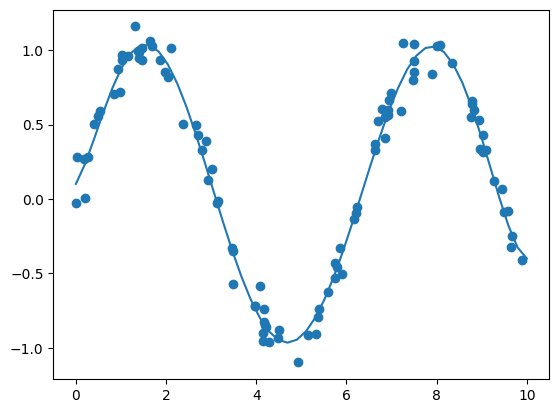

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

# Plot raining data
plt.scatter(x, y)

# Plot test data and its prediction
y_test = poly_model.predict(X_test)
plt.plot(x_test, y_test)
print("The R^2 score for the fit is: ", poly_model.score(X, y))

# Step-by-step, without a pipeline

Now we will do the same sequence of steps (transform the data and train a model on that transformed data) without a pipeline.

In [4]:
# The features transformation step
poly = PolynomialFeatures(15)
# VERY IMPORTANT: fit only the training dataset, not the entire set
# to avoid leakage of test data into the training phase
x_poly = poly.fit_transform(X)

# The classifier step
clf = LinearRegression()
clf.fit(x_poly, y);

Use the trained classifier to predict values and plot the results.

The R^2 score for the fit is:  0.9180746586535192


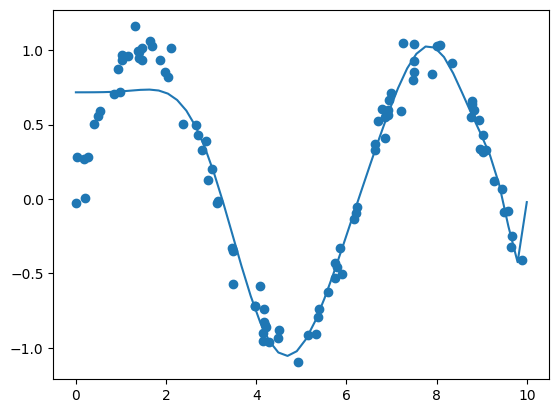

In [5]:
# Plot training data
plt.scatter(x, y)

# Plot test data and its prediction
# Since we trained with a transformed dataset, we also need to
# transform the test dataset to match the features we used for training
# IMPORTANT: at this point we only `transform` - we don't `fit` again
# If we `fit` again, we will end up with different transformation (not what
# we trained the classifier on)
X_test_poly = poly.transform(X_test)
y_test_poly = clf.predict(X_test_poly)
plt.plot(x_test, y_test_poly)
print("The R^2 score for the fit is: ", clf.score(x_poly, y))

# Credits

Inspiration and pieces of code for this notebook came from [chapter 5 (linear regression) of the Python Data Science Handbook](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb#scrollTo=jg-po80qYHj5) and [this linear regression article from Animesh Agarwal](https://towardsdatascience.com/polynomial-regression-bbe8b9d97491).